---
# <center> Лабораторна робота №10 </center>
## __Тема. Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена__
## __Мета:__ засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності засобами Python.
### _Викoнав Міняйло Марк 25.05.24_
-----

### Завдання на самостійну роботу
__1) Побудувати дерево кодів Гафмена згідно з варіантом індивідуального завдання практичної роботи № 9, виданим викладачем вручну і візуалізувати дерево.__

19) Маємо текст AABBBCCCDDDDDEEEEEFFFFFGGGGGHHHHHIIII.
    
    A - 2,
    b - 3,
    c - 3,
    d - 5,
    e - 5,
    f - 5,
    g - 5,
    h - 5,
    i - 4,

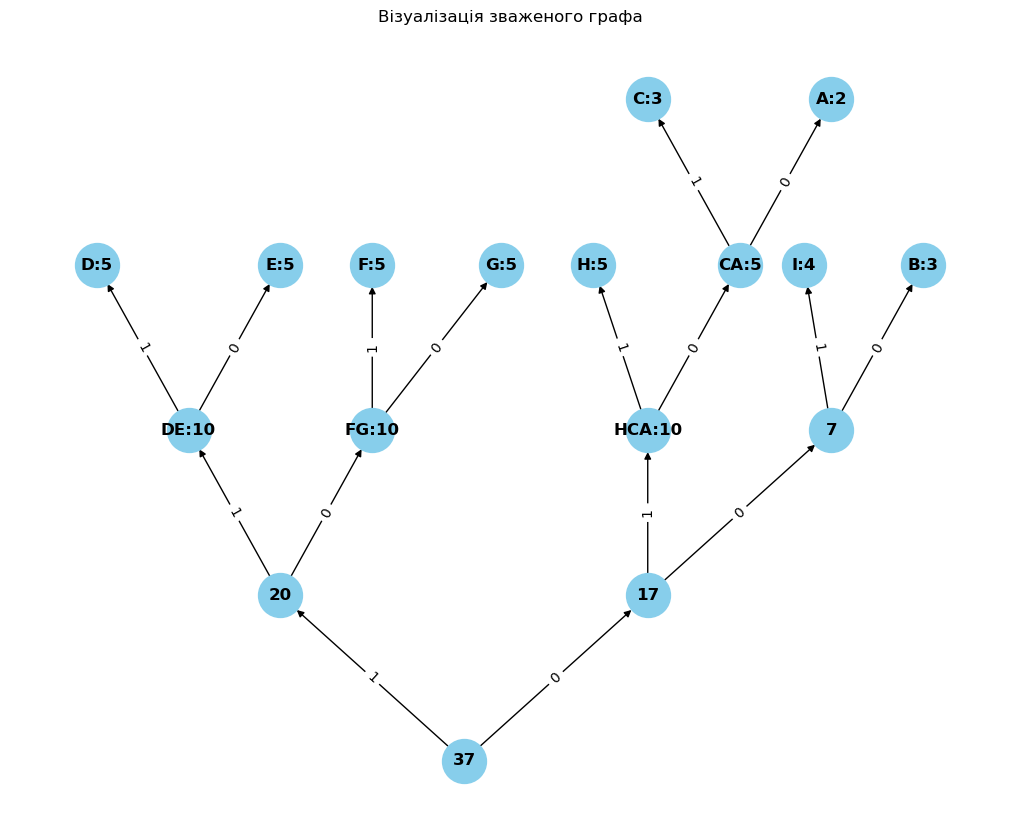

In [36]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

edges = [
    (37, 20, 1), (37, 17, 0), (20, "DE:10", 1), (20, "FG:10", 0), ("DE:10", "D:5", 1),
    ("DE:10", "E:5", 0), ("FG:10", "F:5", 1), ("FG:10", "G:5", 0), (17, "HCA:10", 1), (17, 7, 0),
    ("HCA:10", "H:5", 1), ("HCA:10", "CA:5", 0), ("CA:5", "C:3", 1), ("CA:5", "A:2", 0), (7, "I:4", 1), (7, "B:3", 0)
]

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = {
    37: (0, 0),       
    20: (-1, 0.5),      
    17: (1, 0.5),       
    "DE:10": (-1.5, 1), 
    "FG:10": (-0.5, 1),  
    "HCA:10": (1, 1),    
    7: (2, 1),        
    "D:5": (-2, 1.5),    
    "E:5": (-1, 1.5),     
    "F:5": (-0.5, 1.5),   
    "G:5": (0.2, 1.5),    
    "H:5": (0.7, 1.5),
    "CA:5": (1.5, 1.5),
    "I:4": (1.85, 1.5),        
    "C:3": (1, 2),
    "B:3": (2.5, 1.5),
    "A:2": (2, 2)      
}


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Візуалізація зваженого графа")
plt.show()


A - 0100,
B - 101,
C - 0101,
D - 111,
E - 110,
F - 101,
G - 100,
H - 011,
I - 001

__2) Перевірити результат за допомогою коду, наведеному вище.__

In [4]:
# A Вузол дерева Гафмана 
import heapq 


class node: 
    def __init__(self, freq, symbol, left=None, right=None): 
        # частота символу 
        self.freq = freq 

        # назва символу (символ) 
        self.symbol = symbol 

        # вузол ліворуч від поточного вузла 
        self.left = left 

        # вузол праворуч від поточного вузла 
        self.right = right 

        # напрямок дерева (0/1) 
        self.huff = '' 

    def __lt__(self, nxt): 
        return self.freq < nxt.freq 


# утиліта для виведення кодів Гафмена для  
#  всіх символів у щойно створеному дереві Гафмена 
def printNodes(node, val=''): 

    # Код Гафмена для поточного вузла  
    newVal = val + str(node.huff) 

# якщо вершина не є реберною вершиною 
# то пройти всередині неї 
    if(node.left): 
        printNodes(node.left, newVal) 
    if(node.right): 
        printNodes(node.right, newVal) 

        # якщо node є реберною вершиною тоді 
        # вивести його хаффманівський код 
    if(not node.left and not node.right): 
        print(f"{node.symbol} -> {newVal}") 


# символи для дерева Гафмена 
chars = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'] 

# частота символів 
freq = [2, 3, 3, 5, 5, 5, 5, 5, 4] 

# список, що містить невикористані вершини 
nodes = [] 

# перетворення символів та частот 
# у вузли дерева Гафмена 

for x in range(len(chars)): 
    heapq.heappush(nodes, node(freq[x], chars[x])) 

while len(nodes) > 1: 

    # відсортувати всі вершини за зростанням 
    # на основі їх частоти 
    left = heapq.heappop(nodes) 
    right = heapq.heappop(nodes) 

    # присвоїти значення напрямку цим вузлам 
    left.huff = 0
    right.huff = 1

    # об'єднати 2 найменші вершини, щоб створити 
    # новий вузол як їхній батько 
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right) 

    heapq.heappush(nodes, newNode) 

# Друк кодів Гафмена
printNodes(nodes[0]) 

b -> 000
i -> 001
d -> 010
e -> 011
g -> 100
f -> 101
a -> 1100
c -> 1101
h -> 111


__3) Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq.__

In [49]:
from collections import Counter
import heapq 

# Клас вузла дерева Гафмана
class node: 
    def __init__(self, freq, symbol, left=None, right=None): 
        self.freq = freq 
        self.symbol = symbol 
        self.left = left 
        self.right = right 
        self.huff = '' 

    def __lt__(self, nxt): 
        return self.freq < nxt.freq 

def printNodes(node, val=''): 
    newVal = val + str(node.huff) 
    if(node.left): 
        printNodes(node.left, newVal) 
    if(node.right): 
        printNodes(node.right, newVal) 
    if(not node.left and not node.right): 
        print(f"{node.symbol} -> {newVal}") 

def get_char_freqs(message):
    frequency = Counter(message)
    chars = list(frequency.keys())
    freqs = list(frequency.values())
    return chars, freqs

message = "Написати процедуру,яка обчислює список символів chars,та список їх частот freq"

chars, freq = get_char_freqs(message)

print("Символи:[", ", ".join(chars),"]")
print("Частоти:", freq)

nodes = [] 
for x in range(len(chars)): 
    heapq.heappush(nodes, node(freq[x], chars[x])) 

while len(nodes) > 1: 
    left = heapq.heappop(nodes) 
    right = heapq.heappop(nodes) 
    left.huff = 0
    right.huff = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right) 
    heapq.heappush(nodes, newNode) 


printNodes(nodes[0])


Символи:[ Н, а, п, и, с, т,  , р, о, ц, е, д, у, ,, я, к, б, ч, л, ю, є, м, в, і, c, h, a, r, s, ї, х, f, e, q ]
Частоти: [1, 5, 4, 6, 8, 4, 9, 2, 6, 1, 1, 1, 2, 2, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
у -> 00000
р -> 00001
в -> 00010
Н -> 000110
д -> 000111
х -> 001000
s -> 001001
і -> 001010
h -> 001011
f -> 001100
q -> 001101
r -> 00111
с -> 010
ц -> 011000
е -> 011001
a -> 011010
c -> 011011
п -> 0111
  -> 100
л -> 10100
e -> 101010
, -> 101011
а -> 1011
и -> 1100
о -> 1101
к -> 11100
т -> 11101
є -> 1111000
б -> 1111001
ч -> 111101
я -> 1111100
ї -> 1111101
м -> 1111110
ю -> 1111111


__4) Опрацювати самостійно тему декодування Гафмена і скориставшись наведеним там кодом, декодувати повідомлення, задане варіантом.__

In [58]:
import heapq
from collections import Counter

class node: 
    def __init__(self, freq, symbol, left=None, right=None): 
        self.freq = freq 
        self.symbol = symbol 
        self.left = left 
        self.right = right 
        self.huff = '' 

    def __lt__(self, nxt): 
        return self.freq < nxt.freq 

def printNodes(node, val=''): 
    newVal = val + str(node.huff) 
    if(node.left): 
        printNodes(node.left, newVal) 
    if(node.right): 
        printNodes(node.right, newVal) 
    if(not node.left and not node.right): 
        print(f"{node.symbol} -> {newVal}") 

def get_char_freqs(message):
    frequency = Counter(message)
    chars = list(frequency.keys())
    freqs = list(frequency.values())
    return chars, freqs

def decodeHuffman(encoded_message, huffman_tree):
    decoded_output = ""
    current_node = huffman_tree
    for bit in encoded_message:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right
        if not current_node.left and not current_node.right:
            decoded_output += current_node.symbol
            current_node = huffman_tree
    return decoded_output

message = "this is an example for huffman encoding w"

chars, freq = get_char_freqs(message)

nodes = [] 
for x in range(len(chars)): 
    heapq.heappush(nodes, node(freq[x], chars[x])) 

while len(nodes) > 1: 
    left = heapq.heappop(nodes) 
    right = heapq.heappop(nodes) 
    left.huff = 0
    right.huff = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right) 
    heapq.heappush(nodes, newNode) 

printNodes(nodes[0])

encoded_message = "0101101100011000110000110001100000001000001101100"

decoded_message = decodeHuffman(encoded_message, nodes[0])
print("Декодоване повідомлення:", decoded_message)


o -> 0000
t -> 00010
l -> 00011
r -> 00100
g -> 00101
w -> 00110
u -> 00111
s -> 0100
h -> 0101
d -> 01100
c -> 01101
m -> 0111
x -> 10000
p -> 10001
i -> 1001
f -> 1010
e -> 1011
  -> 110
a -> 1110
n -> 1111
Декодоване повідомлення: hello world


---
#  <center>  Контрольні запитання </center>
1. _Що таке жадібні алгоритми?_

   На кожному кроці жадібний алгоритм обирає те рішення, яке виглядає найкращим в даний момент, не турбуючись про майбутні наслідки цього вибору.

3. _Що таке префіксний код? Який код використовується у коді Гафмена?_

Коди змінної довжини, що присвоюються вхідним символам, є префіксними кодами, тобто коди (послідовності бітів) присвоюються таким чином, що код, присвоєний одному символу, не є префіксом коду, присвоєного будь-якому іншому символу. Кодування Гафмена гарантує, що при декодуванні згенерованого бітового потоку не буде ніякої неоднозначності.

4. _Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?_

Структура даних “купа” та “черга з пріоритетами” тісно пов’язані між собою. Купа - це спеціальний випадок бінарного дерева, в якому значення кожного вузла є більшим або меншим від значень його дочірніх вузлів. Черга з пріоритетами - це тип абстрактних структур даних, який використовується для зберігання елементів з певними пріоритетами. Купа може бути використана для реалізації черги з пріоритетами. Коли елемент додається до черги, він поміщається в купу відповідно до його пріоритету, а коли елемент видаляється з черги, він видаляється з купи

5. _Що таке стиснення даних і для чого воно використовується? Які його головні переваги?_
   
Стиснення даних  — це процес перетворення інформації з метою зменшення обсягу, необхідного для її зберігання або передачі. Стиснення даних може бути реалізоване за допомогою різних алгоритмів і технік, які усувають надлишковість або незначущу інформацію. Головні переваги стиснення даних:
зменшення обсягу даних, значне зменшення розміру файлів, економія часу і ресурсів
   
6. _Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?_

Підрахувати частоти кожного символу у вхідному повідомленні. Створити вузли для кожного символу і додати їх до мін-купки. Повторювати до отримання одного вузла. Вийняти два вузли з найменшими частотами. Об'єднати їх у новий вузол з сумарною частотою. Додати новий вузол назад до купки. Призначити бітові коди символам, проходячи від кореня дерева до листків. Закодувати вхідне повідомлення, замінивши символи їхніми кодами Гафмена.

7. _Які головні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?_

Побудова дерева Гафмена вимагає часу, що пропорційний кількості унікальних символів. Це може бути повільно для великих наборів даних. Гафмен кодує часті символи коротшими кодами, а рідкісні символи - довшими. Якщо всі символи з’являються з приблизно однаковою частотою, код Гафмена може бути неефективним. Щодо покращення продуктивності алгоритму Гафмена, можна використовувати адаптивне кодування Гафмена. В адаптивному кодуванні Гафмена дерево кодування динамічно змінюється з часом на основі вхідних даних, що може покращити ефективність для даних, де розподіл символів змінюється.

8. _Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?_

Алгоритм Лемпела-Зіва-Велча, Арифметичне кодування (Забезпечує більш високе стиснення, особливо для даних з нерівномірним розподілом частот символів),
Алгоритм PPM (Забезпечує високий ступінь стиснення, але може бути складним у реалізації)

9. _Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних ситемах?_

Алгоритм стиснення даних використовуються для зменшення розміру файлів, наприклад, у мультимедіа, базах-даних, машинному навчанні.

---